In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


In [2]:
# start date used to make output.csv
start_date_string = "2018-03-01 00:00:00"
start_date = datetime.strptime(start_date_string, "%Y-%m-%d %H:%M:%S")

timeStep = 4 #hours

numberOfRuns = 552 # Number of times the timestep was computed

timesInRange = [start_date+timedelta(hours=(timeStep*numberOfRuns)) for i in range(numberOfRuns)]

#print(timesInRange)

In [3]:
outputDf = (pd.read_csv("output.csv"))
inputDf = (pd.read_csv("data/20210204.matilija.dhsvm.discharge.flux.csv"))
           
header_list = ["col","row","segment","length.m", "bank.height.m","channel.width.m"]
mapDf = (pd.read_csv("data/stream.map.csv", "\t", names=header_list))
           



In [4]:
mapDf.head()

,col,row,segment,length.m,bank.height.m,channel.width.m
0,382,124,139,38.74103,0.01551,0.3
1,383,125,139,38.74103,0.01551,0.3
2,384,126,139,27.39491,0.01579,0.3
3,385,126,139,38.74103,0.01521,0.3
4,386,127,139,27.39491,0.01511,0.3


In [5]:
outputDf.head()

,segmentId,time,dimensionlessDischarge,overThreshold,threshold
0,1,1.0,0.000000,0,450.162586
1,2,1.0,0.000000,0,51.160831
2,3,1.0,0.000000,0,381.152321
3,4,1.0,0.204557,0,52.225016
4,5,1.0,0.468391,0,52.258619


In [6]:
inputDf.head()



,segment,class,datetime,timestep.s,outflow.m3pts,hyd.width.m,hyd.depth.m,outflow.flux.mpts,outflow.flux.mps
0,1,14,2017-12-01T00:00:00Z,3600,0.0,0.3,1.0,0.0,0.0
1,1,14,2017-12-01T01:00:00Z,3600,0.0,0.3,1.0,0.0,0.0
2,1,14,2017-12-01T02:00:00Z,3600,0.0,0.3,1.0,0.0,0.0
3,1,14,2017-12-01T03:00:00Z,3600,0.0,0.3,1.0,0.0,0.0
4,1,14,2017-12-01T04:00:00Z,3600,0.0,0.3,1.0,0.0,0.0


In [7]:
segments = outputDf['segmentId'].unique()

dimensionlessDischargeSum = {}
outFlowSum = {}
maxSumDD = 0
maxSumFlow = 0
for segment in segments:
    dimensionlessDischargeSum[segment] = sum(outputDf.loc[outputDf['segmentId'] == segment]['dimensionlessDischarge'])
    outFlowSum[segment] = sum(inputDf.loc[inputDf['segment'] == segment]['outflow.m3pts'])
    if dimensionlessDischargeSum[segment] > maxSumDD:
        maxSumDD = dimensionlessDischargeSum[segment]
    if outFlowSum[segment] > maxSumFlow:
        maxSumFlow = outFlowSum[segment]
for segment in segments:
    dimensionlessDischargeSum[segment] = dimensionlessDischargeSum[segment]/maxSumDD
    outFlowSum[segment] = outFlowSum[segment]/maxSumFlow

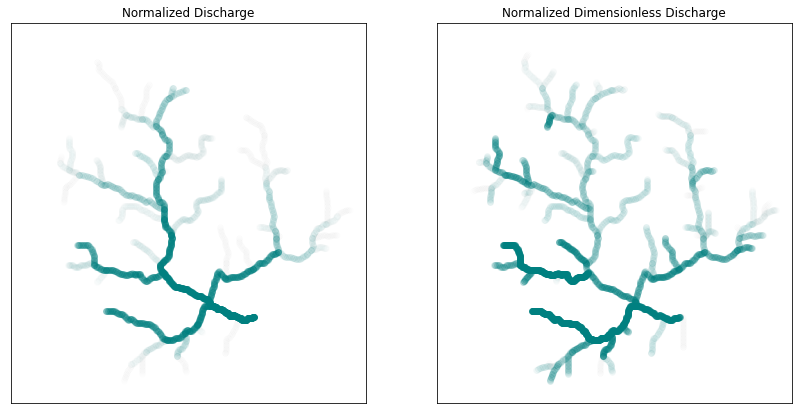

In [8]:
f, (ax1, ax2) = plt.subplots(1, 2)


for segment in segments: 
    cols =  list(mapDf.loc[mapDf['segment'] == segment]['col'])
    rows =  list(mapDf.loc[mapDf['segment'] == segment]['row'])
    
    ax2.scatter(cols,rows, color = 'teal', alpha=dimensionlessDischargeSum[segment])
    ax2.set_title('Normalized Dimensionless Discharge')
    ax1.scatter(cols,rows, color = 'teal', alpha=outFlowSum[segment])
    ax1.set_title('Normalized Discharge')
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax2.set_xticks([])
    ax2.set_yticks([])

f.set_figheight(7)
f.set_figwidth(14)

plt.show()
        


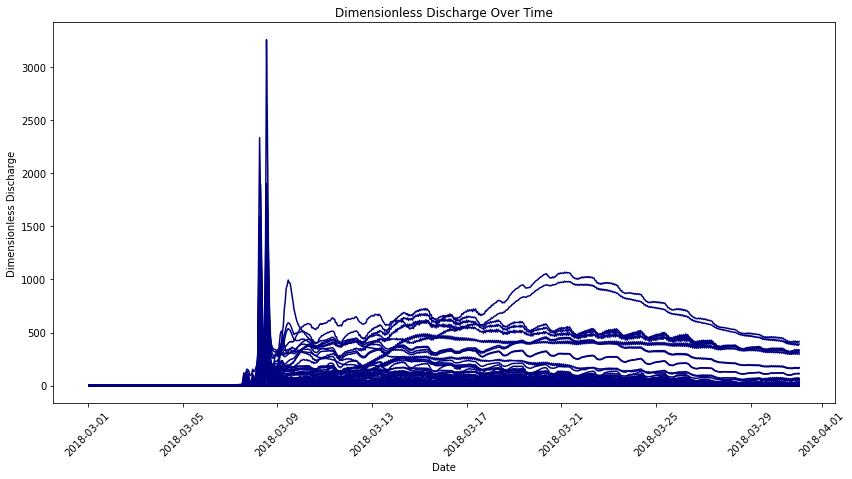

In [9]:
f, ax = plt.subplots(1, 1)

segments = outputDf['segmentId'].unique()
for segment in segments:
    dimensionlessDischargeValues = list(outputDf.loc[outputDf['segmentId'] == segment]['dimensionlessDischarge'])
    dimensionlessDischargeTimeStep = [start_date+timedelta(hours=((time/1)*1))for time in list(outputDf.loc[outputDf['segmentId'] == segment]['time'])]
    ax.plot(dimensionlessDischargeTimeStep, dimensionlessDischargeValues, color="navy")
    plt.xticks(rotation=45)
ax.set_title('Dimensionless Discharge Over Time')
ax.set_ylabel('Dimensionless Discharge')
ax.set_xlabel('Date')
f.set_figheight(7)
f.set_figwidth(14)
plt.show()

In [10]:
# threshold graph (current values not based on real data)

# make list of 1 or 0 if threshold was reached in at any point
thresholdValues = {}
totalOverThreshold = 0
totalSegments = 0
for segment in segments:
    #print(list(outputDf.loc[outputDf['segmentId'] == segment]['overThreshold']))
    if 1.0 in list(outputDf.loc[outputDf['segmentId'] == segment]['overThreshold']):
        thresholdValues[segment] = .5
        totalOverThreshold += 1 
    else:
        thresholdValues[segment] = .03
    totalSegments += 1


In [11]:
print(totalOverThreshold)
print(totalSegments)
print("Percent over threshold: ", (totalOverThreshold/totalSegments)*100)

114
138
Percent over threshold:  82.6086956521739


In [12]:
print(thresholdValues)

{1: 0.03, 2: 0.03, 3: 0.03, 4: 0.5, 5: 0.5, 6: 0.5, 7: 0.03, 8: 0.03, 9: 0.5, 10: 0.03, 11: 0.03, 12: 0.5, 13: 0.5, 14: 0.03, 15: 0.5, 16: 0.5, 17: 0.5, 18: 0.5, 19: 0.5, 20: 0.03, 21: 0.5, 22: 0.5, 23: 0.03, 24: 0.5, 25: 0.5, 26: 0.5, 27: 0.5, 28: 0.5, 29: 0.03, 30: 0.5, 31: 0.5, 32: 0.5, 33: 0.5, 34: 0.5, 35: 0.5, 36: 0.5, 37: 0.5, 38: 0.5, 39: 0.5, 40: 0.5, 41: 0.5, 42: 0.5, 43: 0.5, 44: 0.5, 45: 0.5, 46: 0.5, 47: 0.5, 48: 0.5, 49: 0.5, 50: 0.5, 51: 0.03, 52: 0.5, 53: 0.03, 54: 0.03, 55: 0.5, 56: 0.5, 57: 0.5, 58: 0.5, 59: 0.5, 60: 0.03, 61: 0.03, 62: 0.5, 63: 0.03, 64: 0.5, 65: 0.5, 66: 0.03, 67: 0.5, 68: 0.03, 69: 0.5, 70: 0.03, 71: 0.5, 72: 0.03, 73: 0.5, 74: 0.5, 75: 0.5, 76: 0.5, 77: 0.5, 78: 0.5, 79: 0.5, 80: 0.03, 81: 0.03, 82: 0.5, 83: 0.03, 84: 0.5, 85: 0.5, 86: 0.5, 87: 0.5, 88: 0.5, 89: 0.5, 90: 0.5, 91: 0.5, 92: 0.5, 93: 0.5, 94: 0.5, 95: 0.5, 96: 0.5, 97: 0.5, 98: 0.5, 99: 0.5, 100: 0.5, 101: 0.5, 102: 0.5, 103: 0.5, 104: 0.5, 105: 0.5, 106: 0.5, 107: 0.5, 108: 0.5, 109

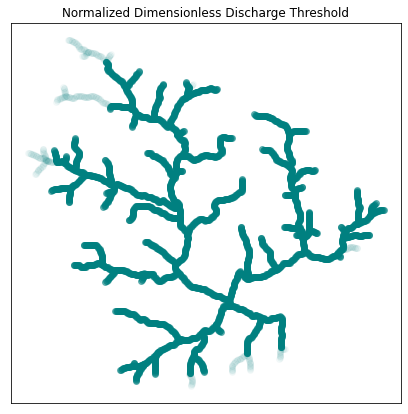

In [13]:
f, ax3 = plt.subplots(1, 1)


for segment in segments: 
    cols =  list(mapDf.loc[mapDf['segment'] == segment]['col'])
    rows =  list(mapDf.loc[mapDf['segment'] == segment]['row'])
    ax3.scatter(cols,rows, color = 'teal', alpha=thresholdValues[segment])
    ax3.set_title('Normalized Dimensionless Discharge Threshold')
    ax3.set_xticks([])
    ax3.set_yticks([])


f.set_figheight(7)
f.set_figwidth(7)

plt.show()

# Variability Testing

In [14]:
def segmentPlot(df):
    f, ax = plt.subplots(1, 1)
    segments = df['segmentId'].unique()
    for segment in segments:
        dimensionlessDischargeValues = list(df.loc[df['segmentId'] == segment]['dimensionlessDischarge'])
        dimensionlessDischargeTimeStep = [start_date+timedelta(hours=((time/1)*1))for time in list(df.loc[df['segmentId'] == segment]['time'])]
        ax.plot(dimensionlessDischargeTimeStep, dimensionlessDischargeValues, color="navy")
        plt.xticks(rotation=45)
    ax.set_title('Dimensionless Discharge Over Time')
    ax.set_ylabel('Dimensionless Discharge')
    ax.set_xlabel('Date')
    f.set_figheight(7)
    f.set_figwidth(14)
    plt.show()
    
def thresholdPlot(df):
    

    thresholdValues = {}
    totalOverThreshold = 0
    totalSegments = 0
    for segment in segments:
        #print(list(outputDf.loc[outputDf['segmentId'] == segment]['overThreshold']))
        if 1.0 in list(df.loc[df['segmentId'] == segment]['overThreshold']):
            thresholdValues[segment] = .5
            totalOverThreshold += 1 
        else:
            thresholdValues[segment] = .03
        totalSegments += 1
    print("Percent over threshold: ", (totalOverThreshold/totalSegments)*100)
    f, ax3 = plt.subplots(1, 1)


    for segment in segments: 
        cols =  list(mapDf.loc[mapDf['segment'] == segment]['col'])
        rows =  list(mapDf.loc[mapDf['segment'] == segment]['row'])
        ax3.scatter(cols,rows, color = 'teal', alpha=thresholdValues[segment])
        ax3.set_title('Normalized Dimensionless Discharge Threshold')
        ax3.set_xticks([])
        ax3.set_yticks([])


    f.set_figheight(7)
    f.set_figwidth(7)

    plt.show()


def makeDimensionlessDischsngeGraphs(fileName):
    outputDfFunc = (pd.read_csv(fileName))
    print(outputDfFunc.head())
    segmentPlot(outputDfFunc)
    thresholdPlot(outputDfFunc)

def dischangeSegmentPlot(df):
    f, ax = plt.subplots(1, 1)
    segments = df['segment'].unique()
    for segment in segments:
        dimensionlessDischargeValues = list(df.loc[df['segment'] == segment]['outflow.flux.mpts'])
        dimensionlessDischargeTimeStep = [time for time in list(df.loc[df['segment'] == segment]['datetime'])]
        ax.plot(dimensionlessDischargeTimeStep, dimensionlessDischargeValues, color="navy")
        plt.xticks(rotation=45)
    ax.set_title('Discharge Over Time')
    ax.set_ylabel('Discharge')
    ax.set_xlabel('Date')
    f.set_figheight(7)
    f.set_figwidth(14)
    print("here")
    plt.show()
    
def makeDischsngeGraphs(fileName):
    outputDfFunc = (pd.read_csv(fileName))
    dischangeSegmentPlot(outputDfFunc)


.5 hour:

   segmentId  time  dimensionlessDischarge  overThreshold   threshold
0          1   0.5                0.000000              0  450.162586
1          2   0.5                0.000000              0   51.160831
2          3   0.5                0.000000              0  381.152321
3          4   0.5                0.073838              0   52.225016
4          5   0.5                0.130130              0   52.258619


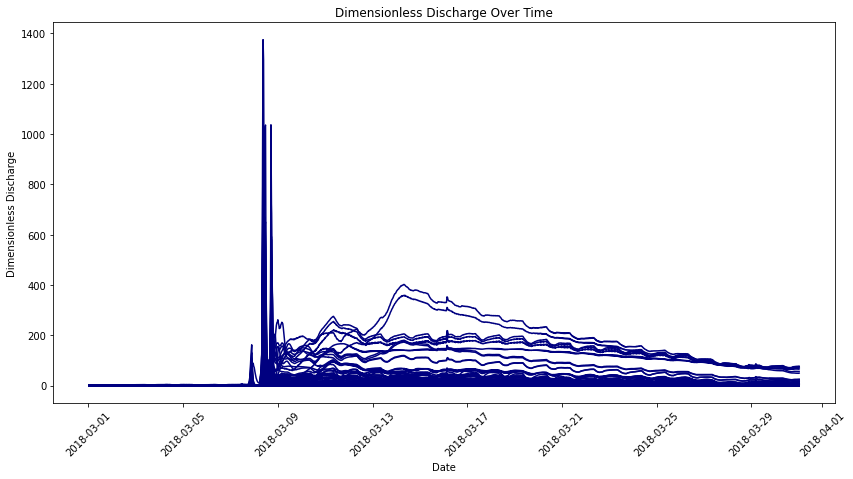

Percent over threshold:  76.81159420289855


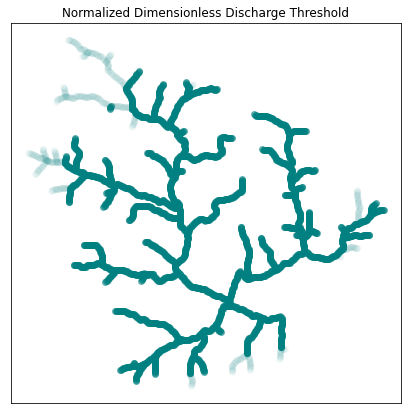

In [20]:
#makeDischsngeGraphs("data/20210413.matilija.dhsvm.discharge.flux.0-05h.csv")
makeDimensionlessDischsngeGraphs("output05h.csv")


1 hour:

   segmentId  time  dimensionlessDischarge  overThreshold   threshold
0          1   1.0                0.000000              0  450.162586
1          2   1.0                0.000000              0   51.160831
2          3   1.0                0.000000              0  381.152321
3          4   1.0                0.056819              0   52.225016
4          5   1.0                0.130109              0   52.258619


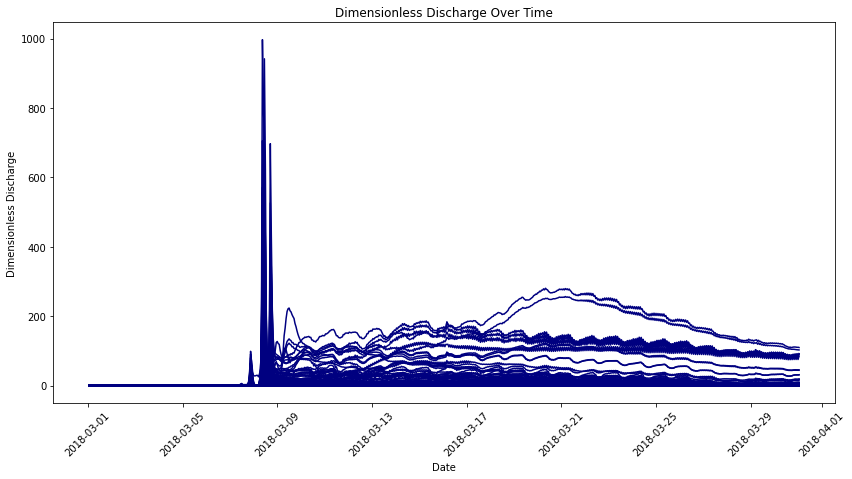

Percent over threshold:  68.84057971014492


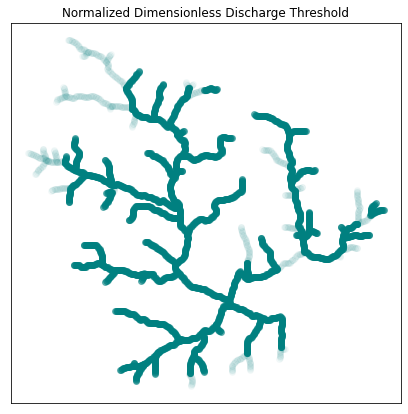

In [22]:
#makeDischsngeGraphs("data/20210413.matilija.dhsvm.discharge.flux.1h.csv")
makeDimensionlessDischsngeGraphs("output1h.csv")

2 hour:

   segmentId  time  dimensionlessDischarge  overThreshold   threshold
0          1   2.0                0.000000              0  450.162586
1          2   2.0                0.000000              0   51.160831
2          3   2.0                0.000000              0  381.152321
3          4   2.0                0.077106              0   52.225016
4          5   2.0                0.129486              0   52.258619


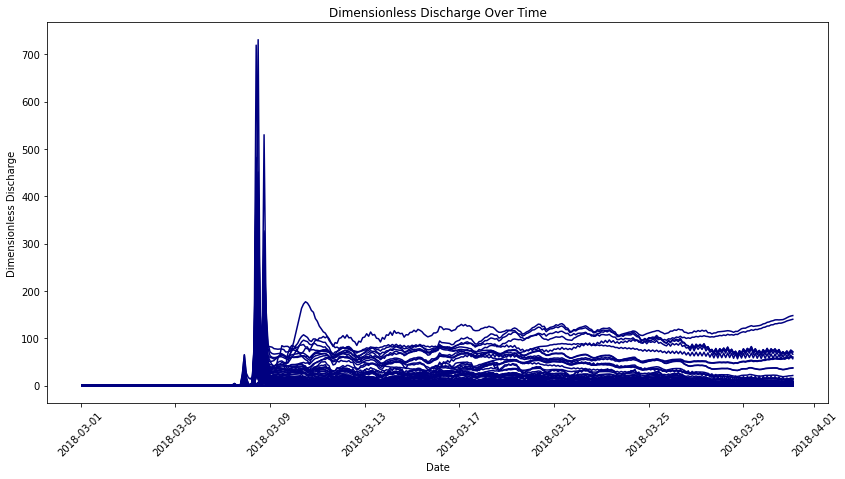

Percent over threshold:  63.76811594202898


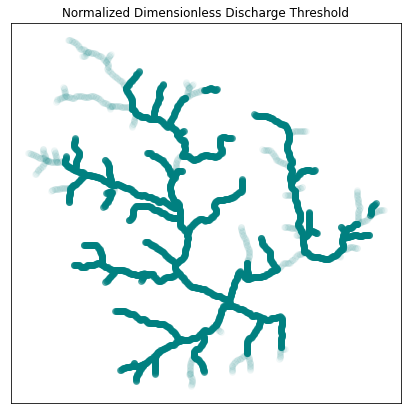

In [23]:
#makeDischsngeGraphs("data/20210413.matilija.dhsvm.discharge.flux.2h.csv")
makeDimensionlessDischsngeGraphs("output2h.csv")

6 hour:

   segmentId  time  dimensionlessDischarge  overThreshold   threshold
0          1   6.0                0.000000              0  450.162586
1          2   6.0                0.000000              0   51.160831
2          3   6.0                0.000000              0  381.152321
3          4   6.0                0.049348              0   52.225016
4          5   6.0                0.142996              0   52.258619


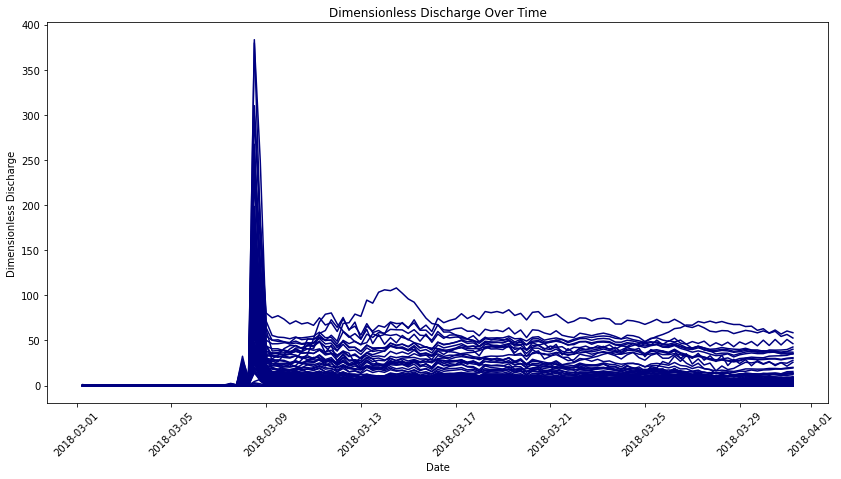

Percent over threshold:  47.82608695652174


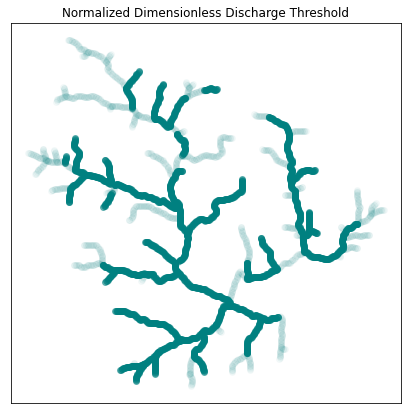

In [24]:
#makeDischsngeGraphs("data/20210413.matilija.dhsvm.discharge.flux.6h.csv")
makeDimensionlessDischsngeGraphs("output6h.csv")

24 hour:

here


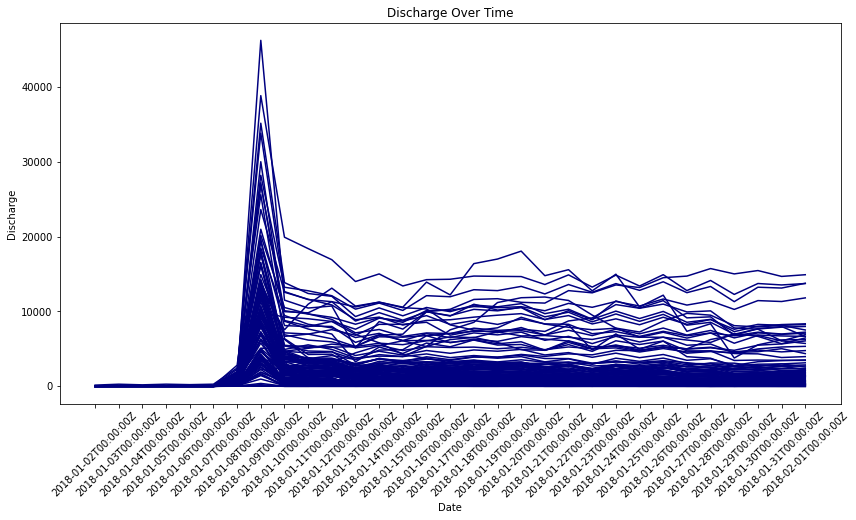

   segmentId  time  dimensionlessDischarge  overThreshold   threshold
0          1  24.0                0.000000              0  450.162586
1          2  24.0               -0.000000              0   51.160831
2          3  24.0               -0.000000              0  381.152321
3          4  24.0               -0.001772              0   52.225016
4          5  24.0               -0.003032              0   52.258619


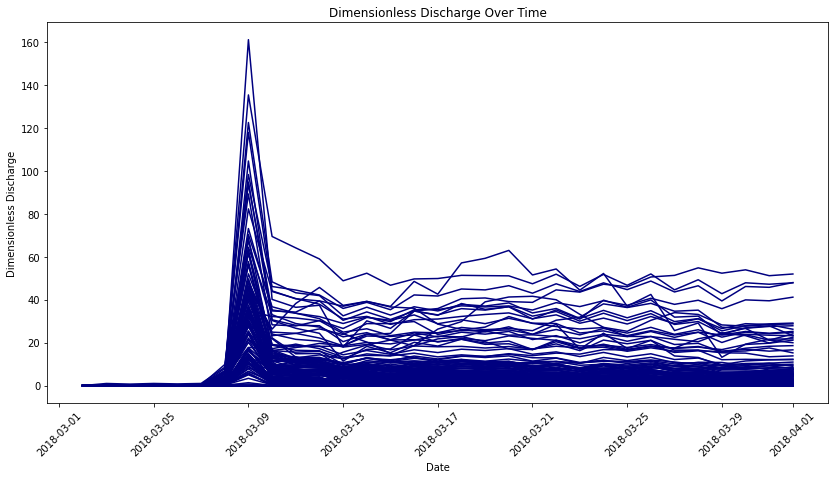

Percent over threshold:  9.420289855072465


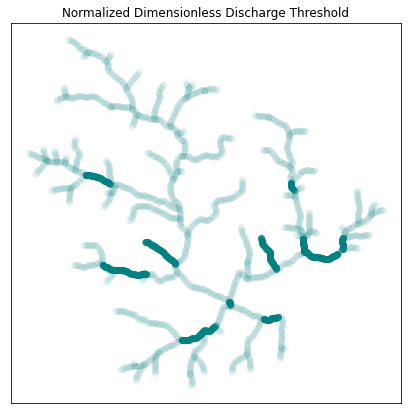

In [25]:
makeDischsngeGraphs("data/20210413.matilija.dhsvm.discharge.flux.24h.csv")
makeDimensionlessDischsngeGraphs("output24h.csv")

# Predicted Debris Flows vs Model

In [53]:
dfFlowLines = (pd.read_csv("data/MatilijaFlowLines.csv"))
dfDebris = (pd.read_csv("data/MatilijaDebris.csv"))

In [54]:
print(dfFlowLines.head())
print(dfDebris.head())

               X             Y
0  281952.921453  3.820496e+06
1  281964.827665  3.820496e+06
2  281978.196588  3.820498e+06
3  281995.080903  3.820501e+06
4  282015.331798  3.820497e+06
               X             Y
0  279878.002467  3.821655e+06
1  279887.688698  3.821648e+06
2  279911.334057  3.821641e+06
3  279928.806479  3.821639e+06
4  279945.618658  3.821639e+06


Change UTM to row/col values

In [55]:
extremeNorth = 3834402.59150284   # Coordinate for northern edge of grid
extremeWest = 823473.920058675   # Coordinate for western edge of grid
gridSpacing = 27                 # Grid resolution in m

flowLinesColVals = []
for x in dfFlowLines['X']:
    col = (x-extremeWest)/gridSpacing
    flowLinesColVals.append(col)
dfFlowLines['col'] = flowLinesColVals

debrisColVals = []
for x in dfDebris['X']:
    col = (x-extremeWest)/gridSpacing
    debrisColVals.append(col)
dfDebris['col'] =debrisColVals

flowLinesRowVals = []
for y in dfFlowLines['Y']:
    row = (y-extremeNorth)/(-1*gridSpacing)
    flowLinesRowVals.append(row)
dfFlowLines['row'] = flowLinesRowVals

debrisRowVals = []
for y in dfDebris['Y']:
    row = (y-extremeNorth)/(-1*gridSpacing)
    debrisRowVals.append(row)
dfDebris['row'] =debrisRowVals


In [56]:
print(dfFlowLines.head())
print(dfDebris.head())
mapDf.head()

               X             Y           col         row
0  281952.921453  3.820496e+06 -20056.333282  515.044861
1  281964.827665  3.820496e+06 -20055.892311  515.056591
2  281978.196588  3.820498e+06 -20055.397166  514.973682
3  281995.080903  3.820501e+06 -20054.771821  514.862591
4  282015.331798  3.820497e+06 -20054.021787  515.006262
               X             Y           col         row
0  279878.002467  3.821655e+06 -20133.182133  472.150833
1  279887.688698  3.821648e+06 -20132.823384  472.394468
2  279911.334057  3.821641e+06 -20131.947630  472.665166
3  279928.806479  3.821639e+06 -20131.300503  472.743546
4  279945.618658  3.821639e+06 -20130.677830  472.743517


,col,row,segment,length.m,bank.height.m,channel.width.m
0,382,124,139,38.74103,0.01551,0.3
1,383,125,139,38.74103,0.01551,0.3
2,384,126,139,27.39491,0.01579,0.3
3,385,126,139,38.74103,0.01521,0.3
4,386,127,139,27.39491,0.01511,0.3


In [60]:
print(min(dfDebris['row']))
print(max(dfDebris['row']))
print(min(mapDf['row']))
print(max(mapDf['row']))

197.26941720667054
581.8684175944438
34
477
